In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/MA999-slides`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/paoloturrini/Documents/GitHub/MA999-slides/Manifest.toml:0


# MA999 - Agent based modelling 2 : the Schelling Model

## MathSys CDT 2023

### Lecturer: Paolo Turrini 
(thanks to Colm Connaughton and Stas Zhydkov) 

## Origin of the Schelling Model

The Schelling model is a simple model of social segregation. 

<a href="https://www.uzh.ch/cmsssl/suz/dam/jcr:00000000-68cb-72db-ffff-ffffff8071db/04.02%7B_%7Dschelling%7B_%7D71.pdf">
Schelling, Thomas C. "*Dynamic models of segregation.*" Journal of mathematical sociology 1.2 (**1971**): 143-186.
</a>

Aim is to understand the social segregation that was a feature of US cities in the 1960's.

One of the earliest computational social science models

## The model

* Agents belong to one of two groups (0 or 1).
* The agents live in a two-dimensional $N \times N$ grid with 8 neighboring positions per position (Chebyshev metric).
* Each position of the grid can be occupied by at most one agent or empty.
* If an agent has at least $n_\text{happy}$ neighbors belonging to the same group, then it is content.
* If an agent is discontent, it keeps moving to new locations until it is content.

Many variations.


## Findings

* A priori one might expect that segregation results when agents prefer locations where a majority of their neighbours are of the same group ($n_\text{happy} >4$ in this case).
* Simulations show that even for $n_\text{happy} = 3$, strong segregation develops over time.
* Schelling's work demonstrates that "mild" in-group preference towards one's own group can still lead to a highly segregated society.

## How to quantify segregation?

* Suppose the group of agent $i$ is $g_i$ and the neighbours of agent $i$ are $\mathcal{N}_i$:
* Proportion of "out-group" links for agent $i$ is

$$ s_i = \frac{\sum_{j \in \mathcal{N}_i} \left( 1 - \delta_{g_i\,g_j} \right)}{\left|\mathcal{N}_i \right|}$$

* Average of $s_i$ over all the agents is called the interface density:

$$S = \frac{\sum_{i=1}^{N^2} s_i}{N^2} $$.

## Building the model

We need to define:

* agent
* space
* agent update rule
* scheduler
* model update rule (to calculate the interface density *after* all agents have had an opportunity to move)

In [2]:
using Agents
using Plots
using Statistics
include("code/Schelling.jl")

Main.Schelling

## Running the model and extracting data

In [3]:
N = 100
vac=0.1
results =Dict()
for threshold in [1,2,3,4]
    println("Running model with min_to_be_happy = ", threshold)
    model = Schelling.initialize(numagents = floor(N*N*(1.0-vac)), griddims = (N, N), 
        min_to_be_happy = threshold)
    adata = [(:mood, sum), (:interfaces, mean), (:neighbours, mean)]
    data, _ = run!(model, Schelling.agent_step!, Schelling.model_step!, 100; adata)
    results[threshold] = data
end

Running model with min_to_be_happy = 1
Running model with min_to_be_happy = 2
Running model with min_to_be_happy = 3
Running model with min_to_be_happy = 4


## The interface density

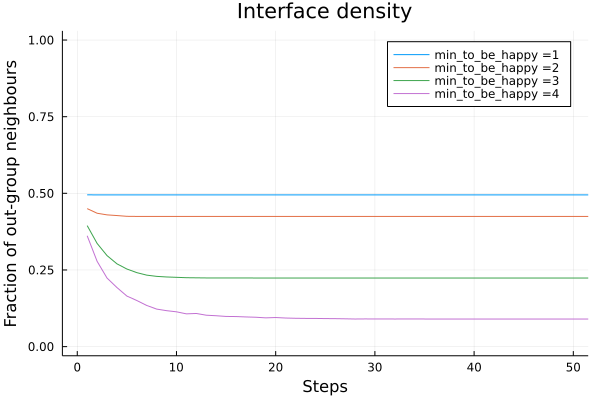

In [4]:
p = plot(ylim=[0,1], xlim=[0,50], title="Interface density", xlabel="Steps", ylabel="Fraction of out-group neighbours")
for threshold in [1,2,3,4]
    plot!(p,results[threshold][2:end,:mean_interfaces], label="min_to_be_happy ="*string(threshold))
end
p

## Visualising the dynamics of the model

In [5]:
using InteractiveDynamics
using CairoMakie # choosing a plotting backend

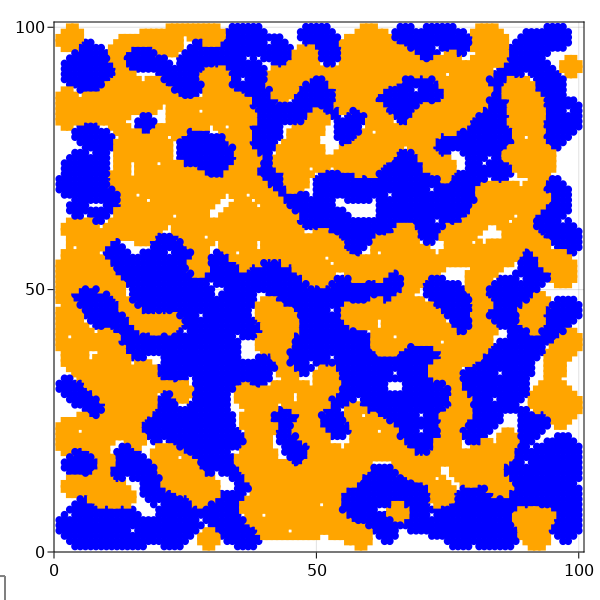

In [6]:
model = Schelling.initialize(numagents = floor(N*N*(1.0-vac)), griddims = (N, N), 
        min_to_be_happy = 4)
run!(model, Schelling.agent_step!, Schelling.model_step!, 100)
groupcolor(a) = a.group == 1 ? :blue : :orange
groupmarker(a) = a.group == 1 ? :circle : :rect
figure, _ = abm_plot(model; ac = groupcolor, am = groupmarker, as = 10)
figure # returning the figure displays it

## Making animations

In [7]:
model = Schelling.initialize(numagents = floor(N*N*(1.0-vac)), griddims = (N, N), min_to_be_happy = 4)
abm_video(
    "schelling_happy_4.mp4", model, Schelling.agent_step!, Schelling.model_step!;
    ac = groupcolor, am = groupmarker, as = 10,
    framerate = 4, frames = 100,
    title = "Schelling's segregation model, min_to_be_happy=4"
)

## Discussion

* What have we learned from this model? 
* Do you believe it?
* Can you think of useful variations on the model?
* Can you think of other problem domains where these ideas might be relevant?